# Motion Compensation in the image domain

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt
from io_stuff import *
from color import *

### Create three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [2]:
%%bash
jupyter nbconvert --to notebook --execute create_moving_circles.ipynb

[NbConvertApp] Converting notebook create_moving_circles.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 86642 bytes to create_moving_circles.nbconvert.ipynb


### Load the images

In [3]:
prefix = "moving_circle_"
frame_0 = load_img(prefix + "000")
frame_1 = load_img(prefix + "001")
frame_2 = load_img(prefix + "002")

### Work only with luma

In [4]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

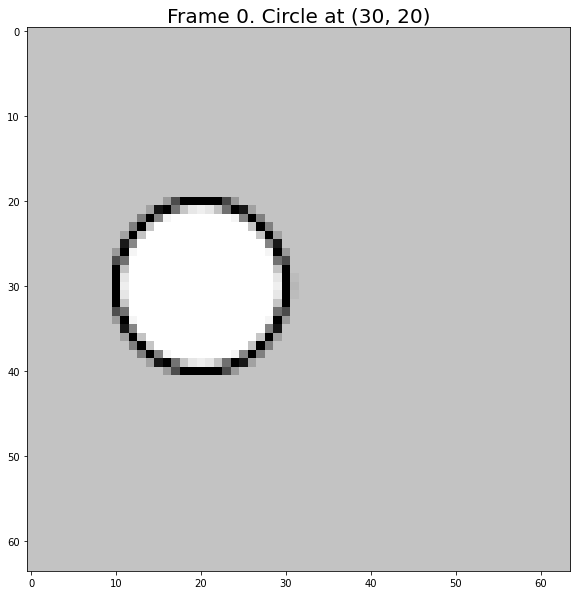

In [5]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Circle at (30, 20)", fontsize=20)
plt.imshow(frame_0_Y, cmap='gray')
plt.savefig("frame_0_Y.png")
plt.show()

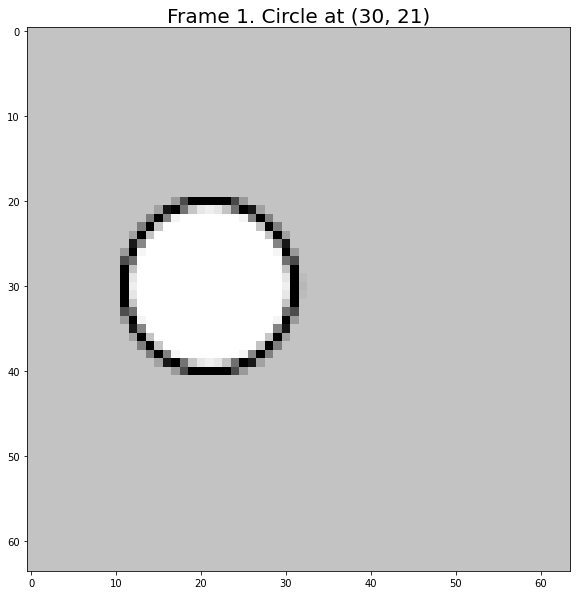

In [6]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Circle at (30, 21)", fontsize=20)
plt.imshow(frame_1_Y, cmap='gray')
plt.savefig("frame_1_Y.png")
plt.show()

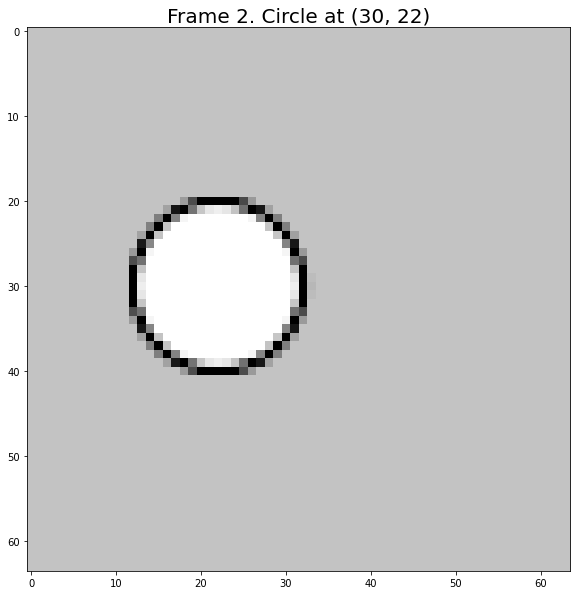

In [7]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Circle at (30, 22)", fontsize=20)
plt.imshow(frame_2_Y, cmap='gray')
plt.savefig("frame_2_Y.png")
plt.show()

### Motion estimation (ME) in the pixel domain
Notice that this ME would be used if the original frames where available. This is not the case in MRCV!

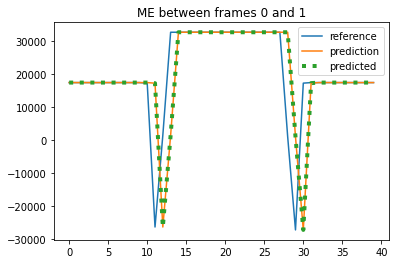

In [8]:
# Plot the first part (from pixel 0 to 39) of the horizontal line (row 35) of the luminance.
plt.title("ME between frames 0 and 1")
plt.plot(frame_0_Y[35, 0:40], label="reference")
plt.plot(np.roll(frame_0_Y[35, 0:40], 1), label="prediction")
#plt.show()
plt.plot(frame_1_Y[35, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("movement_0.svg")
#plt.savefig("movement_0.pdf")
plt.show()

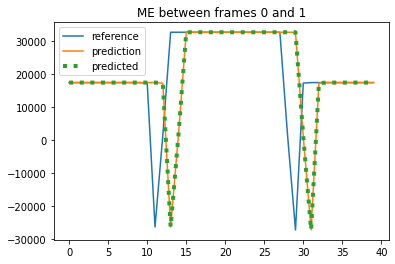

In [9]:
plt.title("ME between frames 0 and 1")
plt.plot(frame_0_Y[35, 0:40], label="reference")
plt.plot(np.roll(frame_0_Y[35, 0:40], 2), label="prediction")
#plt.show()
plt.plot(frame_2_Y[35, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("movement_1.svg")
#plt.savefig("movement_1.pdf")
plt.show()